In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
d2025 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E0.csv")
d2024 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E1.csv")
d2023 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E2.csv")
d2022 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E3.csv")
d2021 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E4.csv")
d2020 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E5.csv")
d2019 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E6.csv")
d2018 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E7.csv")
d2017 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E8.csv")
d2016 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E9.csv")
d2015 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E10.csv")
d2014 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E11.csv")
d2013 = pd.read_csv("C:/Users/Ilias/documents/cours_mines/projets/fpreds/datapl/E12.csv")

d2025['season'] = 2025
d2024['season'] = 2024
d2023['season'] = 2023


d2024

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,BFH,BFD,BFA,PSH,PSD,PSA,WHH,WHD,WHA,1XBH,...,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,1XBCH,1XBCD,1XBCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,BFEC>2.5,BFEC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA,season
0,E0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0,1.60,4.20,5.25,1.60,4.4,5.25,1.60,4.33,5.00,1.63,4.38,5.30,1.65,4.2,5.00,1.68,...,1.65,4.23,5.28,1.60,4.2,5.50,1.66,4.15,5.33,1.70,4.33,5.50,1.66,4.20,5.02,1.72,4.20,5.40,1.62,2.30,1.63,2.38,1.66,2.45,1.61,2.37,1.68,2.46,-0.75,1.86,2.07,1.83,2.11,1.88,2.11,1.82,2.05,1.90,2.08,2024
1,E0,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0,8.50,5.50,1.33,7.50,5.5,1.36,8.50,5.50,1.33,8.18,5.84,1.34,8.50,5.5,1.33,8.60,...,8.14,6.09,1.34,8.00,5.5,1.35,8.57,5.85,1.34,8.57,6.25,1.39,7.87,5.81,1.35,8.60,6.20,1.37,1.36,3.20,1.37,3.30,1.40,3.38,1.37,3.18,1.40,3.40,1.50,2.05,1.88,2.04,1.90,2.20,2.00,1.99,1.88,2.04,1.93,2024
2,E0,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0,1.18,7.50,13.00,1.20,7.5,13.50,1.15,8.00,16.00,1.16,8.56,16.22,1.18,7.0,17.00,1.20,...,1.15,9.05,18.76,1.15,8.0,19.00,1.16,9.39,16.60,1.17,9.40,21.00,1.15,8.62,18.11,1.17,9.40,21.00,1.40,3.00,1.41,2.98,1.45,3.00,1.42,2.93,1.44,3.20,-2.25,2.02,1.91,2.00,1.90,2.05,1.93,1.99,1.87,2.02,1.96,2024
3,E0,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0,2.63,3.30,2.63,2.65,3.4,2.60,2.70,3.40,2.63,2.73,3.36,2.71,2.60,3.5,2.70,2.68,...,3.15,3.41,2.40,3.10,3.3,2.40,3.16,3.47,2.34,3.16,3.50,2.45,3.06,3.40,2.38,3.15,3.55,2.46,1.93,1.97,1.93,1.97,1.95,2.00,1.89,1.96,1.94,2.04,0.25,1.87,2.06,1.86,2.07,1.92,2.10,1.83,2.04,1.88,2.11,2024
4,E0,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0,1.36,5.25,8.00,1.35,5.5,7.75,1.33,5.50,8.50,1.35,5.70,8.25,1.35,5.5,8.00,1.37,...,1.42,5.30,7.26,1.40,5.0,7.50,1.39,5.34,7.90,1.44,5.75,8.00,1.39,5.27,7.33,1.43,5.50,8.20,1.44,2.75,1.46,2.85,1.46,3.05,1.43,2.84,1.49,2.98,-1.25,1.87,2.06,1.88,2.06,1.89,2.10,1.82,2.05,1.89,2.10,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,25/05/2025,16:00,Newcastle,Everton,0,1,A,0,0,D,T Harrington,17,14,6,6,12,9,12,3,1,4,0,0,1.33,5.50,8.50,NaN,NaN,NaN,1.30,5.50,9.00,1.33,5.85,8.55,NaN,NaN,NaN,1.36,...,1.28,6.19,10.36,NaN,NaN,NaN,1.30,6.11,10.20,1.30,6.60,12.50,1.27,6.18,10.88,1.27,7.00,13.00,1.44,2.75,1.47,2.75,1.50,2.81,1.47,2.71,1.50,2.94,-1.75,2.00,1.85,2.01,1.90,2.01,1.95,1.95,1.91,1.93,2.05,2024
376,E0,25/05/2025,16:00,Nott'm Forest,Chelsea,0,1,A,0,0,D,A Taylor,10,6,2,2,10,11,7,4,2,2,0,0,3.00,3.75,2.20,NaN,NaN,NaN,3.20,3.60,2.15,3.15,3.76,2.22,NaN,NaN,NaN,3.19,...,3.50,3.87,2.07,NaN,NaN,NaN,3.50,3.86,2.06,3.55,3.90,2.11,3.44,3.78,2.06,3.55,3.90,2.14,1.67,2.20,1.70,2.24,1.71,2.28,1.68,2.21,1.76,2.28,0.50,1.80,2.05,1.86,2.08,1.86,2.08,1.81,2.05,1.86,2.14,2024
377,E0,25/05/2025,16:00,Southampton,Arsenal,1,2,A,0,1,A,D Bond,7,23,2,8,7,8,5,8,0,0,0,0,8.50,6.00,1.30,NaN,NaN,NaN,11.00,5.50,1.25,9.46,5.85,1.30,NaN,NaN,NaN,10.40,...,11.73,6.54,1.25,NaN,NaN,NaN,12.20,6.11,1.28,12.20,6.80,1.28,11.73,6.40,1.25,13.00,6.80,1.28,1.40,3.00,1.41,2.99,1.41,3.05,1.40,2.97,1.45,3.15,1.75,2.03,1.83,2.04,1.87,2.07,1.87,2.03,1.83,2.06,1.89,2024
378,E0,25/05/2025,16:00,Tottenham,Brighton,1,4,A,1,0,H,R Jones,4,23,2,8,13,8,2,11,3,1,0,0,4.20,4.33,1.70,NaN,NaN,NaN,4.20,4.40,1.70,4.33,4.52,1.71,NaN,NaN,NaN,4.38,...,3.83,4.06,1.92,NaN,NaN,NaN,3.63,4.12,1.95,3.90,4.15,1.95,3.71,4.02

In [68]:
print(d2024.columns)

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH',
       'AvgCAHA', 'BFECAHH', 'BFECAHA', 'season'],
      dtype='object', length=121)


In [69]:
teams = d2025['HomeTeam'].unique().tolist()
print(teams)

['Liverpool', 'Aston Villa', 'Brighton', 'Sunderland', 'Tottenham', 'Wolves', 'Chelsea', "Nott'm Forest", 'Man United', 'Leeds', 'West Ham', 'Man City', 'Bournemouth', 'Brentford', 'Burnley', 'Arsenal', 'Crystal Palace', 'Everton', 'Fulham', 'Newcastle']


In [70]:
dico = {'Man City' : 1,
        'Arsenal' : 2,
        'Liverpool' : 3,
        'Aston Villa' : 4,
        'Tottenham' : 5,
        'Chelsea' : 6,
        'Newcastle' : 7,
        'Man United' : 8,
        'West Ham' : 9,
        'Crystal Palace' : 10,
        'Brighton' : 11,
        'Bournemouth' : 12,
        'Fulham' : 13,
        'Wolves' : 14,
        'Everton' : 15,
        'Brentford' : 16,
        "Nott'm Forest" : 17,
        'Leicester' : 18,
        'Ipswich' : 19,
        'Southampton' : 20,
        'Burnley' : 21,
        'Sheffield United' : 22, 
        'Luton' : 23,
        'Sunderland' : 24,
        'Leeds' : 25, 
        'Cardiff' : 26,
        'Hull' : 27,
        'Middlesbrough' : 28,
        'Norwich' : 29,
        'QPR' : 30,
        'Stoke' : 31,
        'Swansea' : 32,
        'Watford' : 33,
        'West Brom' : 34,
        'Huddersfield' : 35
        }

In [71]:
features = ['day_code', 'Home', 'Away', 'B365H', 'PSH', 'home_match_number', 'home_won']

def prepare_data_with_form(df_raw):
    matches = df_raw.copy()
    
    matches['Date'] = pd.to_datetime(matches['Date'], dayfirst=True)
    matches = matches.sort_values(by='Date')
    #matches['Hour'] = matches['Time'].str.replace(":.+", "", regex=True).astype("int")
    matches["day_code"] = matches["Date"].dt.dayofweek
    
    conditions = [
        (matches['FTR'] == 'H'),
        (matches['FTR'] == 'D'),
        (matches['FTR'] == 'A')
    ]
    points_home = [3, 1, 0]
    points_away = [0, 1, 3]
    won_home = [1, 0, 0] 
    won_away = [0, 0, 1] 
    
    matches['points_home'] = np.select(conditions, points_home, default=np.nan)
    matches['points_away'] = np.select(conditions, points_away, default=np.nan)
    matches['won_home'] = np.select(conditions, won_home, default=np.nan)
    matches['won_away'] = np.select(conditions, won_away, default=np.nan)

    home_df = matches[['Date', 'day_code', 'HomeTeam', 'AwayTeam', 'points_home', 'won_home', 'B365H', 'B365D', 'B365A', 'PSH', 'PSD', 'PSA', 'FTHG', 'HS', 'FTAG', 'AST', 'HST']].copy()
    home_df = home_df.rename(columns={
        'HomeTeam': 'team',
        'AwayTeam': 'opponent',
        'points_home': 'points',
        'won_home': 'won',
        'B365H': 'odd_win',
        'B365D': 'odd_draw',
        'B365A': 'odd_lose',
        'PSH': 'odd_win_p',
        'PSD': 'odd_draw_p',
        'PSA': 'odd_lose_p', 
        'FTHG': 'goals',
        'FTAG': 'conceded_goals',
        'HS': 'shots',
        'AST': 'shots_on_target_conceded',
        'HST': 'shots_on_target'
    })
    home_df['is_home'] = 1

    away_df = matches[['Date', 'day_code', 'HomeTeam', 'AwayTeam', 'points_away', 'won_away', 'B365H', 'B365D', 'B365A', 'PSH', 'PSD', 'PSA', 'FTAG', 'AS', 'FTHG', 'HST','AST']].copy()
    away_df = away_df.rename(columns={
        'HomeTeam': 'opponent',
        'AwayTeam': 'team',
        'points_away': 'points',
        'won_away': 'won',
        'B365H': 'odd_lose',
        'B365D': 'odd_draw',
        'B365A': 'odd_win',
        'PSH': 'odd_lose_p',
        'PSD': 'odd_draw_p',
        'PSA': 'odd_win_p',
        'FTAG': 'goals',
        'FTHG': 'conceded_goals',
        'AS': 'shots',
        'HST': 'shots_on_target_conceded',
        'AST': 'shots_on_target'

    })
    away_df['is_home'] = 0

    home_df['favorite'] = ((home_df['odd_win'] - home_df['odd_lose'] + home_df['odd_win_p'] - home_df['odd_lose_p']) < 0).astype(int)
    away_df['favorite'] = ((away_df['odd_win'] - away_df['odd_lose'] + away_df['odd_win_p'] - away_df['odd_lose_p']) < 0).astype(int)

    home_df['conceded_goals_3'] = home_df.groupby('team')['conceded_goals'].shift(1).rolling(3, min_periods=1).mean()
    away_df['conceded_goals_3'] = away_df.groupby('team')['conceded_goals'].shift(1).rolling(3, min_periods=1).mean()

    home_df['conceded_sot_3'] = home_df.groupby('team')['shots_on_target_conceded'].shift(1).rolling(3, min_periods=1).mean()
    away_df['conceded_sot_3'] = away_df.groupby('team')['shots_on_target_conceded'].shift(1).rolling(3, min_periods=1).mean()

    home_df['sot_3'] = home_df.groupby('team')['shots_on_target'].shift(1).rolling(3, min_periods=1).mean()
    away_df['sot_3'] = away_df.groupby('team')['shots_on_target'].shift(1).rolling(3, min_periods=1).mean()

    df_long = pd.concat([home_df, away_df], ignore_index=True)
    
    df_long = df_long.sort_values(by=['team', 'Date'])

    df_long['MatchWeek'] = df_long.groupby('team').cumcount() + 1
        
    df_long['form_last_3_points'] = df_long.groupby('team')['points'].shift(1).rolling(3, min_periods=1).sum()

    df_long['form_last_3_shots'] = df_long.groupby('team')['shots'].shift(1).rolling(3, min_periods=1).mean()

    df_long['form_last_3_goals'] = df_long.groupby('team')['goals'].shift(1).rolling(3, min_periods=1).mean()

    df_long = df_long.fillna(0) #pour le début de saison
    
    df_long['team_code'] = df_long['team'].replace(dico)
    df_long['opponent_code'] = df_long['opponent'].replace(dico)
    
    return df_long

season5_long = prepare_data_with_form(d2025)
season4_long = prepare_data_with_form(d2024)
season3_long = prepare_data_with_form(d2023)
season2_long = prepare_data_with_form(d2022)
season1_long = prepare_data_with_form(d2021)
season0_long = prepare_data_with_form(d2020)
season19_long = prepare_data_with_form(d2019)
season18_long = prepare_data_with_form(d2018)
season17_long = prepare_data_with_form(d2017)
season16_long = prepare_data_with_form(d2016)
season15_long = prepare_data_with_form(d2015)
season14_long = prepare_data_with_form(d2014)
season13_long = prepare_data_with_form(d2013)


season4_long.head(10)

C:\Users\Ilias\AppData\Local\Temp\ipykernel_15180\4030757816.py:93: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_long['team_code'] = df_long['team'].replace(dico)
C:\Users\Ilias\AppData\Local\Temp\ipykernel_15180\4030757816.py:94: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_long['opponent_code'] = df_long['opponent'].replace(dico)
C:\Users\Ilias\AppData\Local\Temp\ipykernel_15180\4030757816.py:93: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beha

,Date,day_code,team,opponent,points,won,odd_win,odd_draw,odd_lose,odd_win_p,odd_draw_p,odd_lose_p,goals,shots,conceded_goals,shots_on_target_conceded,shots_on_target,is_home,favorite,conceded_goals_3,conceded_sot_3,sot_3,MatchWeek,form_last_3_points,form_last_3_shots,form_last_3_goals,team_code,opponent_code
2,2024-08-17,5,Arsenal,Wolves,3.0,1.0,1.18,7.50,13.00,1.16,8.56,16.22,2,18,0,3,6,1,1,0.000000,0.000000,0.000000,1,0.0,0.000000,0.000000,2,14
390,2024-08-24,5,Arsenal,Aston Villa,3.0,1.0,1.75,3.80,4.33,1.77,3.98,4.55,2,9,0,3,4,0,1,0.000000,0.000000,0.000000,2,3.0,18.000000,2.000000,2,4
25,2024-08-31,5,Arsenal,Brighton,1.0,0.0,1.33,5.50,8.50,1.34,5.87,8.10,1,11,1,4,7,1,1,1.333333,4.666667,4.000000,3,6.0,13.500000,2.000000,2,11
418,2024-09-15,6,Arsenal,Tottenham,3.0,1.0,2.30,3.50,3.00,2.32,3.62,3.03,1,7,0,5,4,0,1,1.333333,4.666667,4.000000,4,7.0,12.666667,1.666667,2,5
429,2024-09-22,6,Arsenal,Man City,1.0,0.0,4.50,3.60,1.80,4.54,3.66,1.85,2,5,2,11,3,0,0,0.333333,5.000000,3.333333,5,7.0,9.000000,1.333333,2,1
54,2024-09-28,5,Arsenal,Leicester,3.0,1.0,1.17,8.00,15.00,1.18,8.27,14.09,4,36,2,3,16,1,1,1.000000,3.333333,6.333333,6,5.0,7.666667,1.333333,2,18
62,2024-10-05,5,Arsenal,Southampton,3.0,1.0,1.14,9.00,17.00,1.13,9.46,19.13,3,29,1,2,6,1,1,1.000000,4.666667,7.333333,7,7.0,16.000000,2.333333,2,20
456,2024-10-19,5,Arsenal,Bournemouth,0.0,0.0,1.65,3.90,5.00,1.68,4.13,5.01,0,6,2,4,1,0,1,3.333333,11.333333,3.666667,8,7.0,23.333333,3.000000,2,12
89,2024-10-27,6,Arsenal,Liverpool,1.0,0.0,2.50,3.25,2.90,2.54,3.40,2.90,2,9,2,4,3,1,1,1.000000,2.666667,8.000000,9,6.0,23.666667,2.333333,2,3
475,2024-11-02,5,Arsenal,Newcastle,0.0,0.0,1.95,3.75,3.75,1.99,3.69,3.85,0,10,1,4,1,0,1,1.000000,2.666667,5.333333,10,4.0,14.666667,1.666667,2,7


In [72]:
features_to_use = [
    'day_code', 
    #'Hour',
    'odd_win',      # La cote de victoire selon B365
    'odd_draw',    
    'odd_lose',     
    'odd_win_p',    # La cote de victoire selon Pinnacle
    'odd_draw_p',   
    'odd_lose_p',
    'is_home',
    #'MatchWeek',
    'team_code',
    'opponent_code',
    'form_last_3_goals',
    'form_last_3_shots', 
    'form_last_3_points', 
    'won',
    'favorite',
    'conceded_goals_3',
    'conceded_sot_3',
    'sot_3'
]


seasons = [season5_long, season4_long, season3_long, season2_long, season1_long, season0_long, season19_long, season18_long,
           season17_long, season16_long, season15_long, season14_long, season13_long]

train = season13_long[features_to_use]
for df in seasons[4:-1] : 
    train = pd.concat([train, df], ignore_index=True)[features_to_use]


#train = pd.concat([trainn, season5_long], ignore_index=True)[features_to_use]
testtt = pd.concat([season4_long, season5_long], ignore_index=True)[features_to_use]
testt = pd.concat([testtt, season3_long], ignore_index=True)[features_to_use]
test = pd.concat([testt, season2_long], ignore_index=True)[features_to_use]

target_train = train.pop('won')
target_test = test.pop('won')

print(train.shape)
print(test.shape)

(6842, 17)
(2420, 17)


In [73]:
def ROI(bet, df, preds, target) : 
    df["benef"] = (bet*((preds == target).astype(int))*(df["odd_win"]-1) - bet*((preds != target).astype(int)))*(preds == 1).astype(int)
    benef = df["benef"].sum()
    number_of_bets = (preds == 1).astype(int).sum()
    return (benef, number_of_bets)


<h2> I - First Metric to evaluate our ROI : Balanced Accuracy</h2>

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,  make_scorer, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

param_grid={
    'max_depth': [4, 3, 2],
    'n_estimators' : [320, 260, 300, 280],
    'learning_rate' : [0.05, 0.04, 0.03],
    'colsample_bytree': [0.7, 0.9]    
}

balanced_accuracy = make_scorer(balanced_accuracy_score)

model = XGBClassifier(random_state=1)
grid_search = GridSearchCV(
    estimator = model, 
    param_grid = param_grid,
    cv = 5, 
    n_jobs = -1,
    scoring = balanced_accuracy, 
    verbose = 2
)

grid_search.fit(train, target_train)
print(f"meilleure précision : {grid_search.best_score_:.4f}")
print(f"meilleurs hyperparams : {grid_search.best_params_}")

prime_model = grid_search.best_estimator_
preds = prime_model.predict(test)
bookmaker = test.copy() 
bookmaker['won'] = ((bookmaker['odd_win'] < bookmaker['odd_lose']) & (bookmaker['odd_win'] < bookmaker['odd_draw'])).astype(int)
predsbookmaker = bookmaker['won']
print(f"résultat sur jeu de test : {balanced_accuracy_score(target_test, preds)}")
print(f"résultat du benchmark bet365 : {balanced_accuracy_score(target_test, predsbookmaker)}")

(roi_test,n) = ROI(1, test, preds, target_test)
print(f"retour sur investissement d'un parieur suivant notre algo (based on balanced accuracy): {roi_test}, pour {n} paris effectués")
(roi_bookmaker,n) = ROI(1, test, predsbookmaker, target_test)
print(f"retour sur investissement d'un parieur suivant le bookmaker : {roi_bookmaker}, pour {n} paris effectués")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
meilleure précision : 0.6599
meilleurs hyperparams : {'colsample_bytree': 0.7, 'learning_rate': 0.04, 'max_depth': 2, 'n_estimators': 260}
résultat sur jeu de test : 0.6632893122609511
résultat du benchmark bet365 : 0.6866601717543479
retour sur investissement d'un parieur suivant notre algo (based on balanced accuracy): -17.84, pour 726 paris effectués
retour sur investissement d'un parieur suivant le bookmaker : -21.160000000000007, pour 1195 paris effectués


In [75]:
# xgboost model : 
#meilleure précision : 0.8859
#meilleurs hyperparams : {'colsample_bytree': 0.6, 'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 60}
#résultat sur jeu de test : 0.9230769230769231

Fitting 5 folds for each of 81 candidates, totalling 405 fits
meilleure précision : 0.6681
meilleures hyperparams : {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
résultat sur jeu de test : 0.6619718309859155

               feature  importance
1              odd_win    0.275816
6           odd_lose_p    0.202575
4            odd_win_p    0.134710
3             odd_lose    0.111534
2             odd_draw    0.087275
5           odd_draw_p    0.058662
7              is_home    0.026648
14    conceded_goals_3    0.013868
8            team_code    0.013403
10   form_last_3_goals    0.012316
9        opponent_code    0.012249
11   form_last_3_shots    0.011860
0             day_code    0.011535
12  form_last_3_points    0.010027
15      conceded_sot_3    0.009918
16               sot_3    0.007603
13            favorite    0.000000


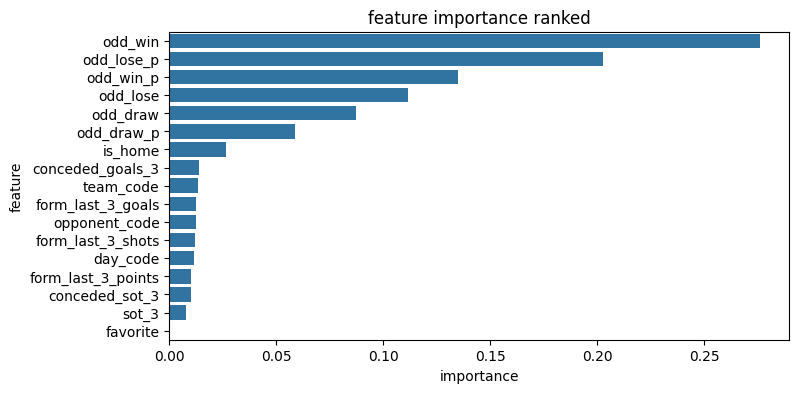

In [76]:
import matplotlib.pyplot as plt 
import seaborn as sns

importances = prime_model.feature_importances_
feature_name = train.columns
feature_imp = pd.DataFrame({
    'feature' : feature_name,
    'importance' : importances
})

feature_imp = feature_imp.sort_values(by = 'importance', ascending = False)

print(feature_imp)
plt.figure(figsize=(8,4))
sns.barplot(x = 'importance', y = 'feature', data = feature_imp)
plt.title('feature importance ranked')
plt.show()

<h2> II - Second Metric to evaluate our ROI : Precision </h2>

In [86]:
seasons = [season5_long, season4_long, season3_long, season2_long, season1_long, season0_long, season19_long, season18_long,
           season17_long, season16_long, season15_long, season14_long, season13_long]

train = season13_long[features_to_use]
for df in seasons[4:-1] : 
    train = pd.concat([train, df], ignore_index=True)[features_to_use]


#train = pd.concat([trainn, season5_long], ignore_index=True)[features_to_use]
testtt = pd.concat([season4_long, season5_long], ignore_index=True)[features_to_use]
testt = pd.concat([testtt, season3_long], ignore_index=True)[features_to_use]
test = pd.concat([testt, season2_long], ignore_index=True)[features_to_use]
target_train = train.pop('won')
target_test = test.pop('won')

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,  make_scorer, balanced_accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

param_grid={'colsample_bytree': [0.8, 0.9], 
            'learning_rate': [0.01, 0.007], 
            'max_depth': [5, 6, 7], 
            'n_estimators': [60, 70, 100]}

precision = make_scorer(precision_score)

model = XGBClassifier(random_state=1)
grid_search = GridSearchCV(
    estimator = model, 
    param_grid = param_grid,
    cv = 5, 
    n_jobs = -1,
    scoring = precision, 
    verbose = 2
)

grid_search.fit(train, target_train)
print(f"meilleure précision : {grid_search.best_score_:.4f}")
print(f"meilleurs hyperparams : {grid_search.best_params_}")

prime_model = grid_search.best_estimator_
preds = prime_model.predict(test)
bookmaker = test.copy() 
bookmaker['won'] = ((bookmaker['odd_win'] < bookmaker['odd_lose']) & (bookmaker['odd_win'] < bookmaker['odd_draw'])).astype(int)
predsbookmaker = bookmaker['won']
print(f"résultat sur jeu de test : {precision_score(target_test, preds)}")
print(f"résultat du benchmark bet365 : {precision_score(target_test, predsbookmaker)}")

(roi_test,n) = ROI(1, test, preds, target_test)
print(f"retour sur investissement d'un parieur suivant notre algo (based on precision): {roi_test}, pour {n} paris effectués")
(roi_bookmaker,n) = ROI(1, test, predsbookmaker, target_test)
print(f"retour sur investissement d'un parieur suivant le bookmaker : {roi_bookmaker}, pour {n} paris effectués")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
meilleure précision : 0.7646
meilleurs hyperparams : {'colsample_bytree': 0.8, 'learning_rate': 0.007, 'max_depth': 6, 'n_estimators': 60}
résultat sur jeu de test : 0.7863636363636364
résultat du benchmark bet365 : 0.5631799163179916
retour sur investissement d'un parieur suivant notre algo (based on precision): 6.879999999999999, pour 220 paris effectués
retour sur investissement d'un parieur suivant le bookmaker : -21.160000000000007, pour 1195 paris effectués


<h2> III - Third Metric to evaluate our ROI : Recall</h2>

In [79]:
seasons = [season5_long, season4_long, season3_long, season2_long, season1_long, season0_long, season19_long, season18_long,
           season17_long, season16_long, season15_long, season14_long, season13_long]

train = season13_long[features_to_use]
for df in seasons[4:-1] : 
    train = pd.concat([train, df], ignore_index=True)[features_to_use]


#train = pd.concat([trainn, season5_long], ignore_index=True)[features_to_use]
testtt = pd.concat([season4_long, season5_long], ignore_index=True)[features_to_use]
testt = pd.concat([testtt, season3_long], ignore_index=True)[features_to_use]
test = pd.concat([testt, season2_long], ignore_index=True)[features_to_use]
target_train = train.pop('won')
target_test = test.pop('won')

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,  make_scorer, balanced_accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

param_grid={'colsample_bytree': [0.6, 0.8], 
            'learning_rate': [0.1, 0.01, 0.05], 
            'max_depth': [5, 6, 3], 
            'n_estimators': [50, 150, 300, 450]}

recall = make_scorer(recall_score)

model = XGBClassifier(random_state=1)
grid_search = GridSearchCV(
    estimator = model, 
    param_grid = param_grid,
    cv = 5, 
    n_jobs = -1,
    scoring = recall, 
    verbose = 2
)

grid_search.fit(train, target_train)
print(f"meilleure précision : {grid_search.best_score_:.4f}")
print(f"meilleurs hyperparams : {grid_search.best_params_}")

prime_model = grid_search.best_estimator_
preds = prime_model.predict(test)
bookmaker = test.copy() 
bookmaker['won'] = ((bookmaker['odd_win'] < bookmaker['odd_lose']) & (bookmaker['odd_win'] < bookmaker['odd_draw'])).astype(int)
predsbookmaker = bookmaker['won']
print(f"résultat sur jeu de test : {recall_score(target_test, preds)}")
print(f"résultat du benchmark bet365 : {recall_score(target_test, predsbookmaker)}")

(roi_test,n) = ROI(1, test, preds, target_test)
print(f"retour sur investissement d'un parieur suivant notre algo (based on recall): {roi_test}, pour {n} paris effectués")
(roi_bookmaker,n) = ROI(1, test, predsbookmaker, target_test)
print(f"retour sur investissement d'un parieur suivant le bookmaker : {roi_bookmaker}, pour {n} paris effectués")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
meilleure précision : 0.4899
meilleurs hyperparams : {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 450}
résultat sur jeu de test : 0.5010752688172043
résultat du benchmark bet365 : 0.7236559139784946
retour sur investissement d'un parieur suivant notre algo (based on recall): -21.72, pour 736 paris effectués
retour sur investissement d'un parieur suivant le bookmaker : -21.160000000000007, pour 1195 paris effectués


In [ ]:
"""import pandas as pd
import numpy as np

features_for_prediction = [
    'day_code', 
    'Hour',
    'odd_win',
    'odd_draw',    
    'odd_lose',     
    'odd_win_p',
    'odd_draw_p',   
    'odd_lose_p',
    'is_home',
    'team_code',
    'opponent_code',
    'form_last_3_goals',
    #'form_last_3_shots', 
    'form_last_3_points', 
    'favorite'
]

day_code = 6 
Hour = 14    

b365h, b365d, b365a = 1.40, 5.0, 6.5
psh, psd, psa = 1.46, 4.55, 7.21

ars_form_points = 9.0
ars_form_goals = (1 + 2 + 2) / 3 

cp_form_points = 4.0
cp_form_goals = (3 + 1 + 2) / 3

data_arsenal = {
    'day_code': day_code, 'Hour': Hour,
    'odd_win': b365h, 'odd_draw': b365d, 'odd_lose': b365a,
    'odd_win_p': psh, 'odd_draw_p': psd, 'odd_lose_p': psa,
    'is_home': 1,
    'team_code': dico['Arsenal'],
    'opponent_code': dico['Crystal Palace'],
    'form_last_3_goals': ars_form_goals,
    'form_last_3_points': ars_form_points,
    'favorite': 1 if (b365h < b365a) else 0
}

data_palace = {
    'day_code': day_code, 'Hour': Hour,
    'odd_win': b365a, 'odd_draw': b365d, 'odd_lose': b365h,
    'odd_win_p': psa, 'odd_draw_p': psd, 'odd_lose_p': psh,
    'is_home': 0,
    'team_code': dico['Crystal Palace'],
    'opponent_code': dico['Arsenal'],
    'form_last_3_goals': cp_form_goals,
    'form_last_3_points': cp_form_points,
    'favorite': 1 if (b365a < b365h) else 0
}

X_test = pd.DataFrame([data_arsenal, data_palace], columns=features_for_prediction)

predsarsenal = prime_model.predict(X_test)

if predsarsenal[0] == 1: 
    print("youhou Arsenal va gagner !")

else : 
    print("snif, je crois bien qu'Arsenal va pas gagner...")"""


'import pandas as pd\nimport numpy as np\n\nfeatures_for_prediction = [\n    \'day_code\', \n    \'Hour\',\n    \'odd_win\',\n    \'odd_draw\',    \n    \'odd_lose\',     \n    \'odd_win_p\',\n    \'odd_draw_p\',   \n    \'odd_lose_p\',\n    \'is_home\',\n    \'team_code\',\n    \'opponent_code\',\n    \'form_last_3_goals\',\n    #\'form_last_3_shots\', \n    \'form_last_3_points\', \n    \'favorite\'\n]\n\nday_code = 6 \nHour = 14    \n\nb365h, b365d, b365a = 1.40, 5.0, 6.5\npsh, psd, psa = 1.46, 4.55, 7.21\n\nars_form_points = 9.0\nars_form_goals = (1 + 2 + 2) / 3 \n\ncp_form_points = 4.0\ncp_form_goals = (3 + 1 + 2) / 3\n\ndata_arsenal = {\n    \'day_code\': day_code, \'Hour\': Hour,\n    \'odd_win\': b365h, \'odd_draw\': b365d, \'odd_lose\': b365a,\n    \'odd_win_p\': psh, \'odd_draw_p\': psd, \'odd_lose_p\': psa,\n    \'is_home\': 1,\n    \'team_code\': dico[\'Arsenal\'],\n    \'opponent_code\': dico[\'Crystal Palace\'],\n    \'form_last_3_goals\': ars_form_goals,\n    \'form_last